## Tarea 4

### Puntos a considerar que se desempeñaran en el análisis
- Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código. 
- Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste
- Investigar sobre métricas para analizar los errores de tus datos y discutirla (generalmente se usan MAE, MAPE, RMSE, MSE...)
- Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
- Elegir alguna métrica para determinar número de grupos, usarla y discutirla
- Busca alguna revista científica que publique trabajos relacionados con el tuyo

Leer df y verificar datos

In [37]:
import pandas as pd
data = pd.read_csv('C:/Users/AranzaEstebanAvalos/Documents/AA - ML_docs/df2_loan.csv',low_memory=False)

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Conversión de Fechas
date_columns = ['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']  
for col in date_columns:
    data[col] = pd.to_datetime(data[col])
    data[col] = (data[col] - pd.Timestamp('1970-01-01')).dt.days
df = data.dropna(subset=['loan_amnt'])

In [50]:
df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,default_ind,loanVSfunded,sub_grade_encoded,credit_history
0,1077501.0,5000.0,5000.0,36.0,10.65,162.87,1.0,6.0,10.0,5.0,...,5831.78,861.07,0.0,171.62,0.0,0.0,11322.0,0.0,6.0,11322.0
1,1077430.0,2500.0,2500.0,60.0,15.27,59.83,2.0,13.0,0.0,5.0,...,1008.71,435.17,0.0,119.66,0.0,0.0,5267.0,0.0,13.0,5267.0
2,1077175.0,2400.0,2400.0,36.0,15.96,84.33,2.0,14.0,10.0,5.0,...,3003.65,603.65,0.0,649.91,0.0,0.0,5174.0,0.0,14.0,5174.0
3,1076863.0,10000.0,10000.0,36.0,13.49,339.31,2.0,10.0,10.0,5.0,...,12226.30,2209.33,0.0,357.48,0.0,0.0,6909.0,0.0,10.0,6909.0
4,1075358.0,3000.0,3000.0,60.0,12.69,67.79,1.0,9.0,1.0,5.0,...,3242.17,1009.07,0.0,67.79,0.0,0.0,7305.0,0.0,9.0,7305.0


In [52]:
df.drop(['funded_amnt'], axis=1)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,default_ind,loanVSfunded,sub_grade_encoded,credit_history
0,1077501.0,5000.0,36.0,10.65,162.87,1.0,6.0,10.0,5.0,24000.0,...,5831.78,861.07,0.0,171.62,0.0,0.0,11322.0,0.0,6.0,11322.0
1,1077430.0,2500.0,60.0,15.27,59.83,2.0,13.0,0.0,5.0,30000.0,...,1008.71,435.17,0.0,119.66,0.0,0.0,5267.0,0.0,13.0,5267.0
2,1077175.0,2400.0,36.0,15.96,84.33,2.0,14.0,10.0,5.0,12252.0,...,3003.65,603.65,0.0,649.91,0.0,0.0,5174.0,0.0,14.0,5174.0
3,1076863.0,10000.0,36.0,13.49,339.31,2.0,10.0,10.0,5.0,49200.0,...,12226.30,2209.33,0.0,357.48,0.0,0.0,6909.0,0.0,10.0,6909.0
4,1075358.0,3000.0,60.0,12.69,67.79,1.0,9.0,1.0,5.0,80000.0,...,3242.17,1009.07,0.0,67.79,0.0,0.0,7305.0,0.0,9.0,7305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10096,831792.0,5000.0,36.0,7.49,155.51,2.0,3.0,0.0,5.0,62000.0,...,5074.52,151.80,0.0,1176.27,0.0,0.0,4322.0,0.0,3.0,4322.0
10097,831907.0,25000.0,60.0,14.79,592.00,2.0,13.0,3.0,5.0,105500.0,...,25182.95,309.50,0.0,25314.34,0.0,0.0,2831.0,0.0,13.0,2831.0
10098,831873.0,10000.0,36.0,8.49,315.63,2.0,4.0,0.0,5.0,38000.0,...,11281.80,1281.80,0.0,99.58,0.0,0.0,5387.0,0.0,4.0,5387.0
10099,804094.0,25000.0,60.0,15.99,607.82,0.0,16.0,6.0,5.0,51000.0,...,31798.04,11222.01,0.0,607.82,0.0,0.0,6058.0,0.0,16.0,6058.0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Suponiendo que 'loan_amnt' es tu variable objetivo
X = df.drop('loan_amnt', axis=1)
y = df['loan_amnt']

# Dividiendo los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creando y entrenando el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluando el modelo
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.13409203364670955


El valor de precisión es considerablemente muy bajo, lo que sugiere que el modelo es solo ligeramente mejor que una elección al azar en una clasificación binaria por lo que se evaluaran mas modelos

GridSearchCV - Hiperparametros
 
Proporciona un método sistemático y riguroso para optimizar hiperparámetros de modelos de aprendizaje automático, realizando una búsqueda exhaustiva en un espacio de parámetros predefinido y evaluando cada combinación a través de la validación cruzada para garantizar una estimación fiable del rendimiento del modelo. Finalmente, se selecciona la mejor combinación de hiperparámetros basándose en una métrica de rendimiento específica.

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definiendo el modelo
knn = KNeighborsClassifier()

# Definiendo el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurando la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, n_jobs=-1)

# Ajustando el modelo a tus datos
grid_search.fit(X_train, y_train)

# Mejores parámetros
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor precisión: ", grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores parámetros:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Mejor precisión:  0.30037128712871286


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Suponiendo que ya tienes tus conjuntos de datos X_train, X_test, y_train, y_test

# Crear el modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Puedes ajustar más hiperparámetros si es necesario

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6872835230084117


Arboles de decisión 

Modelos intuitivos y fáciles de interpretar, tienen tendencia a sobreajustarse a los datos de entrenamiento, aprendiendo patrones específicos que pueden no ser generalizables. Además, son sensibles a variaciones en los datos, lo que puede afectar su rendimiento. Por tanto, ante un alto rendimiento, como una precisión de 0.906 (verificar si hay sobreajuste), utilizando técnicas como la validación cruzada y comparando con otros modelos, para asegurar que el rendimiento observado sea realmente representativo de su capacidad de generalización.

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividiendo los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando el modelo de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42)

# Entrenando el modelo
decision_tree.fit(X_train, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Evaluando el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9059871350816427


K-Means

El objetivo es dividir un conjunto de datos en grupos (o "clusters") de manera que los puntos de datos dentro de un grupo sean más similares entre sí que con los de otros grupos. Este algoritmo se basa en la idea de encontrar una posición central para cada cluster (conocidos como "centroides") y asignar los puntos de datos al cluster cuyo centroide sea más cercano.

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preparando los datos para el análisis de clusters, excluyendo 'funded_amnt'
X_cluster = df.drop('funded_amnt', axis=1)

# Normalizando los datos para el análisis de clusters
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determinar el rango de números de clusters a probar
cluster_range = range(2, 8)

# Aplicar K-Means y calcular el método del codo y el coeficiente de silueta
sse = []  
silhouette_coefficients = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

# Resultados para el método del codo y coeficiente de silueta
sse, silhouette_coefficients


([164062.39326523026,
  151679.72771318964,
  142406.33612285898,
  132969.49101200135,
  125521.57532946205,
  120928.78189018938],
 [0.234686033562665,
  0.10262004665033418,
  0.11690414184670384,
  0.10480423588602467,
  0.11708447545825208,
  0.09007574091474684])

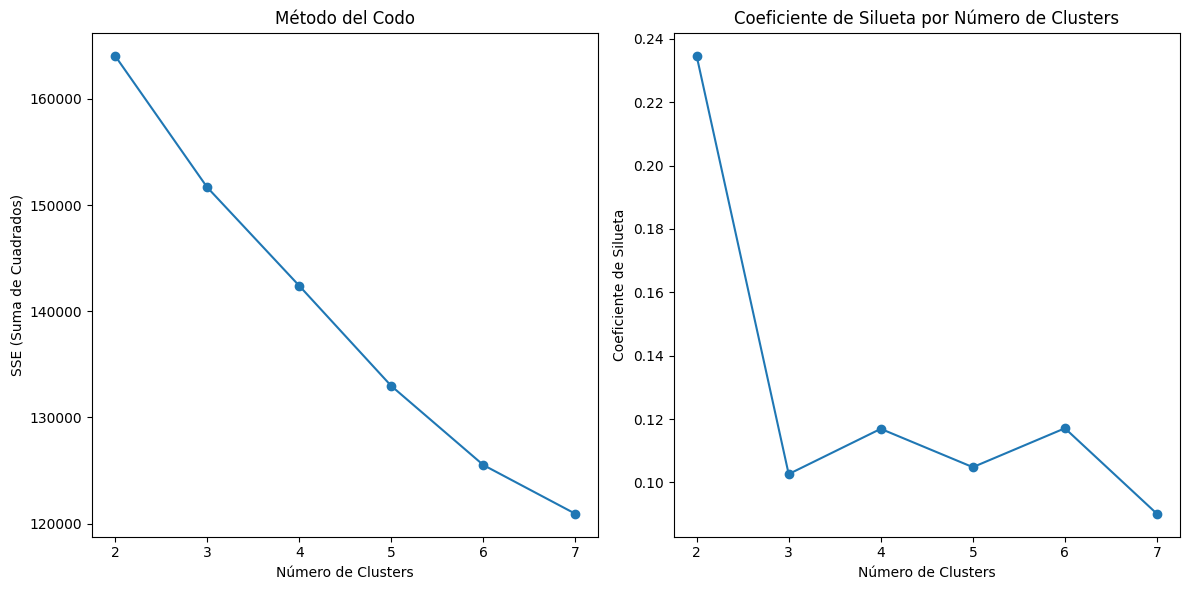

In [62]:
# Determinar el Número Óptimo de Clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Suma de Cuadrados)')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_coefficients, marker='o')
plt.title('Coeficiente de Silueta por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')

plt.tight_layout()
plt.show()


PCA

Técnica de reducción de dimensionalidad muy utilizada en el campo de aprendizaje automático y estadística. Esta técnica es útil para simplificar la complejidad en conjuntos de datos de alta dimensión mientras se retiene la mayor cantidad de información posible.

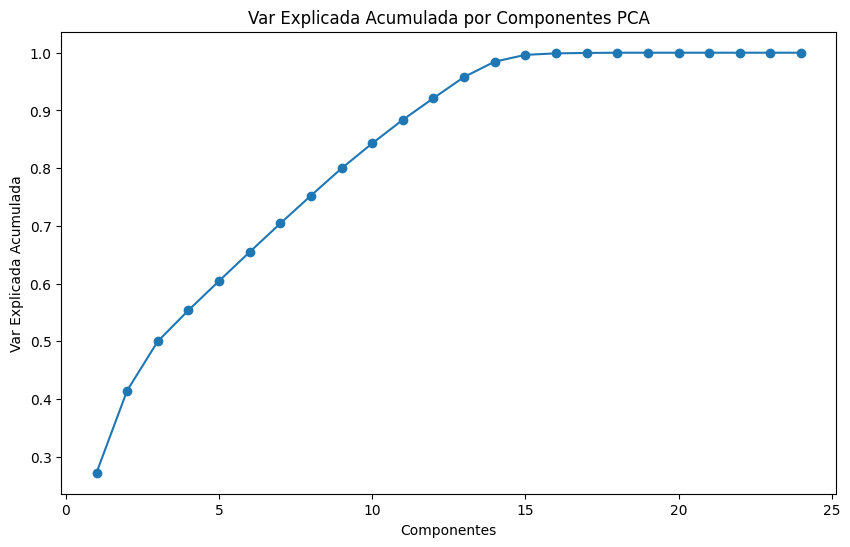

array([0.27240291, 0.14235868, 0.0852822 , 0.05371108, 0.05081979,
       0.05017665, 0.04946501, 0.04822053, 0.04722988, 0.04327137])

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicando PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Proporción de Var explicada por cada componente
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.title('Var Explicada Acumulada por Componentes PCA')
plt.xlabel('Componentes')
plt.ylabel('Var Explicada Acumulada')
plt.show()

explained_variance[:10]

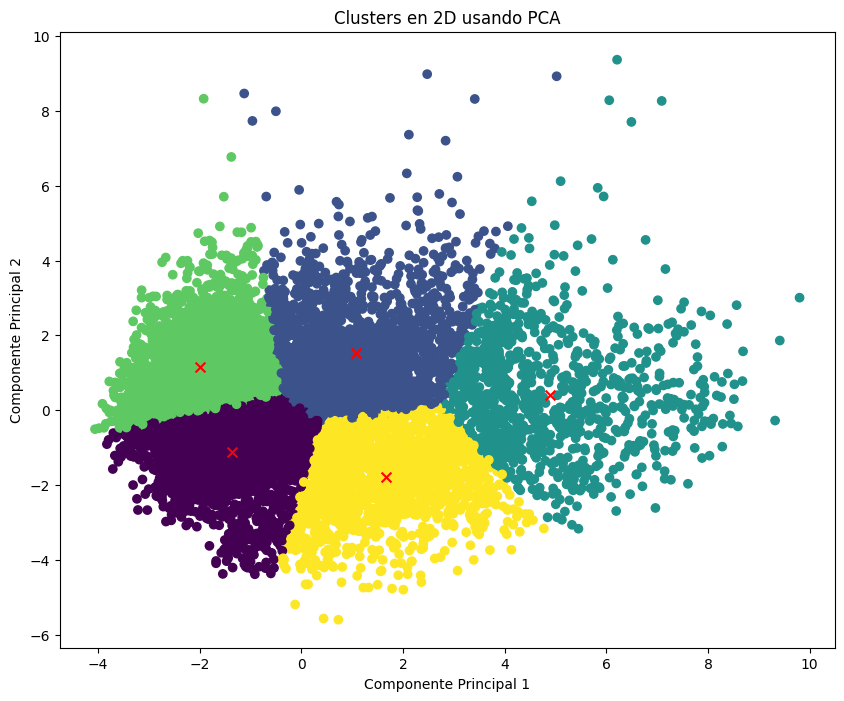

In [68]:
# Aplicando PCA para reducir a 2 dimensiones
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Aplicando K-Means a los datos reducidos
kmeans_2d = KMeans(n_clusters=5, random_state=42)
kmeans_2d.fit(X_pca_2d)
labels = kmeans_2d.labels_

# Graficando los clusters en 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Clusters en 2D usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Dibujar los centroides
centroids = kmeans_2d.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='x')

plt.show()
